In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import subprocess # to run simulation
import re # grep in string

In [14]:
"""de"""
#label_thr = "Durchsatz"
#label_read = "lesen"
#label_write = "schreiben"
#label_combined = "kombiniert"
"""en"""
label_thr = "Throughput"
label_read = "read"
label_write = "write"
label_combined = "combined"

# PLOTS

In [15]:
plt.rcParams['figure.figsize'] = [3, 3]
pos = [1, 2, 4, 8, 16]

In [16]:
def getThroughput(arg1, arg2, arg3, arg4, arg5):
    arg1 = str(arg1) # SCS, CCS, SCRA, CCRA
    arg2 = str(arg2) # R, W, RW
    arg3 = str(arg3) # burstlegth
    arg4 = str(arg4) # transactions per CPU
    arg5 = str(arg5) # chunk size
    program = "/home/veronia/Downloads/HBM_sim/build/benchmark"
    stdout = subprocess.run([program, arg1, arg2, arg3, arg4, arg5], check=True, capture_output=True, text=True).stdout
    line = re.search("Xilinx Total Throughput.*\n", stdout).group()
    value = re.search("[+-]?\d+\.\d+", line).group()
    return float(value)

In [17]:
def executeBenchmark(runs, benchmark, transactionsPerCPU, chunkSize):
    runs = int(runs)
    benchmark = str(benchmark)
    transactionsPerCPU = int(transactionsPerCPU)
    chunkSize = int(chunkSize)
    
    rd = np.zeros(5)
    wr = np.zeros(5)
    rw = np.zeros(5)
    index = 0
    for i in [1, 2, 4, 8, 16]:
        for j in range(runs):
            rd[index] += getThroughput(benchmark, "R", i, transactionsPerCPU, chunkSize)
        rd[index] /= runs
        index = index + 1
    print("R: ", rd)
    index = 0
    for i in [1, 2, 4, 8, 16]:
        for j in range(runs):
            wr[index] += getThroughput(benchmark, "W", i, transactionsPerCPU, chunkSize)
        wr[index] /= runs
        index = index + 1
    print("W: ", wr)
    index = 0
    for i in [1, 2, 4, 8, 16]:
        for j in range(runs):
            rw[index] += getThroughput(benchmark, "RW", i, transactionsPerCPU, chunkSize)
        rw[index] /= runs
        index = index + 1
    print("RW: ", rw)
    return (rd, wr, rw)

## SCS for 1000 transactions per Initiator (32)

R:  [4.69 9.37 9.47 9.53 9.55]
W:  [4.7  9.54 9.56 9.57 9.57]
RW:  [ 6.2  11.88 12.47 12.1  12.39]


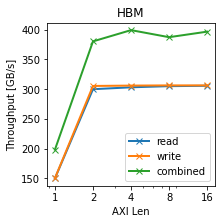

HBM
len   1 r 150.1 w 150.4 rw 198.4
len   2 r 299.8 w 305.3 rw 380.2
len   4 r 303.0 w 305.9 rw 399.0
len   8 r 305.0 w 306.2 rw 387.2
len  16 r 305.6 w 306.2 rw 396.5


In [59]:
benchmark = "SCS"
transactionsPerCPU = 1000
chunkSize = 32
runs = 1

(rd, wr, rw) = executeBenchmark(runs, benchmark, transactionsPerCPU, chunkSize)

rd *= 32
wr *= 32
rw *= 32

fig,ax = plt.subplots()
ax.set_xscale('log')#, base=2)
plt.xticks(pos)
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))

ax.plot(pos, rd, "x-", label=label_read, linewidth=2)
ax.plot(pos, wr, "x-", label=label_write, linewidth=2)
ax.plot(pos, rw, "x-", label=label_combined, linewidth=2)

plt.xlabel("AXI Len")
plt.ylabel("{} [GB/s]".format(label_thr))
#plt.savefig('figures/scs.pdf', bbox_inches='tight')  
plt.title("HBM")
plt.legend()
plt.show()

print("HBM")
for i in range(5):
    print("len {:3} r {:4.1f} w {:4.1f} rw {:4.1f}".format(pos[i], rd[i], wr[i], rw[i]))

## CCS for 1000 transactions per Initiator (32)

R:  [4.8  9.59 9.59 9.6  9.6 ]
W:  [4.8  9.58 9.57 9.6  9.6 ]
RW:  [ 5.25  9.58 11.92 12.42 12.49]


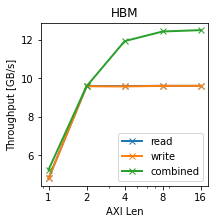

HBM
len   1 r  4.8 w  4.8 rw  5.2
len   2 r  9.6 w  9.6 rw  9.6
len   4 r  9.6 w  9.6 rw 11.9
len   8 r  9.6 w  9.6 rw 12.4
len  16 r  9.6 w  9.6 rw 12.5


In [68]:
benchmark = "CCS"
transactionsPerCPU = 1000
chunkSize = 32
runs = 1

(rd, wr, rw) = executeBenchmark(runs, benchmark, transactionsPerCPU, chunkSize)

fig,ax = plt.subplots()
ax.set_xscale('log')#, base=2)
plt.xticks(pos)
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))

ax.plot(pos, rd, "x-", label=label_read, linewidth=2)
ax.plot(pos, wr, "x-", label=label_write, linewidth=2)
ax.plot(pos, rw, "x-", label=label_combined, linewidth=2)

plt.xlabel("AXI Len")
plt.ylabel("{} [GB/s]".format(label_thr))
#plt.savefig('figures/ccs.pdf', bbox_inches='tight')  
plt.title("HBM")
plt.legend()
plt.show()

print("HBM")
for i in range(5):
    print("len {:3} r {:4.1f} w {:4.1f} rw {:4.1f}".format(pos[i], rd[i], wr[i], rw[i]))

## SCRA for 1000 transactions per Initiator (32) | 20 runs

R:  [3.15 6.26 9.43 9.53 9.56]
W:  [4.66 7.05 9.49 9.53 9.57]
RW:  [ 3.69  6.58 10.42 12.58 13.21]


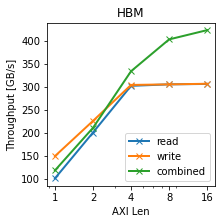

HBM
len   1 r 100.8 w 149.1 rw 118.1
len   2 r 200.3 w 225.6 rw 210.6
len   4 r 301.8 w 303.7 rw 333.4
len   8 r 305.0 w 305.0 rw 402.6
len  16 r 305.9 w 306.2 rw 422.7


In [65]:
benchmark = "SCRA"
transactionsPerCPU = 1000
chunkSize = 32
runs = 1

(rd, wr, rw) = executeBenchmark(runs, benchmark, transactionsPerCPU, chunkSize)

#rd = np.array([152.295, 303.545, 304.967, 305.597, 306.032])
#wr = np.array([152.605, 292.514, 302.339, 304.743, 305.011])
#rw = np.array([150.8455, 222.5435, 270.286,  290.8675, 293.776])

rd *= 32
wr *= 32
rw *= 32

fig,ax = plt.subplots()
ax.set_xscale('log')#, base=2)
plt.xticks(pos)
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))

ax.plot(pos, rd, "x-", label=label_read, linewidth=2)
ax.plot(pos, wr, "x-", label=label_write, linewidth=2)
ax.plot(pos, rw, "x-", label=label_combined, linewidth=2)

plt.xlabel("AXI Len")
plt.ylabel("{} [GB/s]".format(label_thr))
#plt.savefig('figures/scra.pdf', bbox_inches='tight')  
plt.title("HBM")
plt.legend()
plt.show()

print("HBM")
for i in range(5):
    print("len {:3} r {:4.1f} w {:4.1f} rw {:4.1f}".format(pos[i], rd[i], wr[i], rw[i]))

## CCRA for 1000 transactions per Initiator (32) | 20 runs

R:  [ 3.56  7.78 15.01 29.72 53.2 ]
W:  [15.57 30.36 46.62 54.14 55.34]
RW:  [  8.2   16.69  34.94  68.35 118.28]


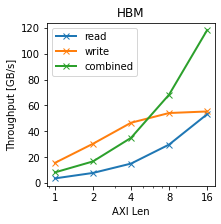

HBM
len   1 r  3.6 w 15.6 rw  8.2
len   2 r  7.8 w 30.4 rw 16.7
len   4 r 15.0 w 46.6 rw 34.9
len   8 r 29.7 w 54.1 rw 68.3
len  16 r 53.2 w 55.3 rw 118.3


In [67]:
benchmark = "CCRA"
transactionsPerCPU = 100
chunkSize = 32
runs = 1

(rd, wr, rw) = executeBenchmark(runs, benchmark, transactionsPerCPU, chunkSize)

#rd = np.array([52.423 67.502 73.044 73.172 73.346])
#wr = np.array([52.341 69.844 72.931 74.104 75.056])
#rw = np.array([110.684 134.979 142.067 146.832 144.958])

fig,ax = plt.subplots()
ax.set_xscale('log')#, base=2)
plt.xticks(pos)
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))

ax.plot(pos, rd, "x-", label=label_read, linewidth=2)
ax.plot(pos, wr, "x-", label=label_write, linewidth=2)
ax.plot(pos, rw, "x-", label=label_combined, linewidth=2)

plt.xlabel("AXI Len")
plt.ylabel("{} [GB/s]".format(label_thr))
#plt.savefig('figures/ccs.pdf', bbox_inches='tight')  
plt.title("HBM")
plt.legend()
plt.show()

print("HBM")
for i in range(5):
    print("len {:3} r {:4.1f} w {:4.1f} rw {:4.1f}".format(pos[i], rd[i], wr[i], rw[i]))